conservation of energy: (2.181974835011888+0j) (2.6271107034794756+0j)
T = (0.7612926236230171+0j); R = (0.06926804978978286+0j)
TMM:
T = [0.76178782] R = [0.07047203]
conservation of energy: (2.2889136963242933+0j) (2.429119613160119+0j)
T = (0.8233435641310953+0j); R = (0.11893761622896624+0j)


C:\Users\rfeng6\AppData\Local\Temp\ipykernel_24540\3016311544.py:56: ComplexWarning: Casting complex values to real discards the imaginary part
  film = FreeFormFilm(n_reverse, d, str(int(n[0])), incidence=str(int(n[-1])))


TMM:
T = [0.82357374] R = [0.11870449]
conservation of energy: (10.478536603345805+0j) (10.794618540286265+0j)
T = (0.18527750587349254+0j); R = (0.7854410576625119+0j)
TMM:
T = [0.18594844] R = [0.78486811]


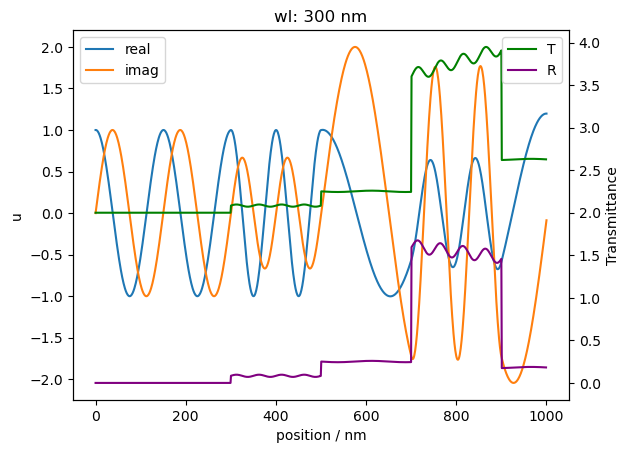

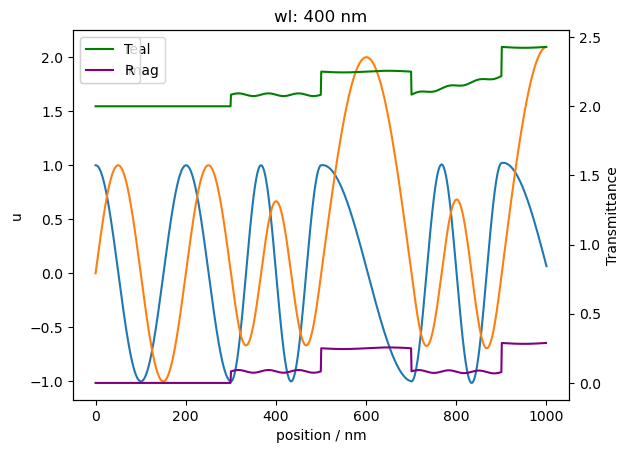

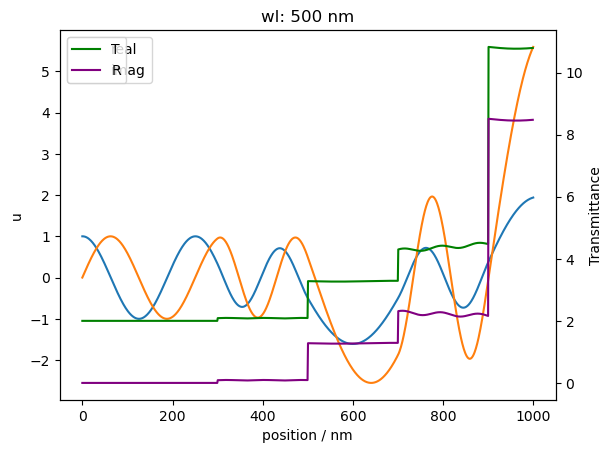

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
import sys
sys.path.append('./../../')
from film import FreeFormFilm


def make_Helmholtz(n, d, wl=100):

    h = d / n.shape[0]
    k0 = 2 * np.pi / wl # in nm

    u = np.zeros(n.shape[0], dtype='complex128')
    
    u[0] = 1
    u[1] = u[0] + 1j * h * k0 * n[0] # this is a bit hair-consuming. 

    for i in range(2, n.shape[0]):
        u[i] = 2 * u[i - 1] - u[i - 2] - (k0 * n[i - 1] * h) ** 2 * u[i - 1]
    
    du = np.array([u[i + 1] - u[i] for i in range(u.shape[0] - 1)]) / (h)
    inward = (du / (1j * k0 * n[:-1]) + u[:-1]) * (du / (1j * k0 * n[:-1]) + u[:-1]).conj() / 4 * n[:-1]
    outward = (du / (1j * k0 * n[:-1]) - u[:-1]) * (du / (1j * k0 * n[:-1]) - u[:-1]).conj() / 4 * n[:-1]
    return np.linspace(0, d, n.shape[0]), inward, outward, u


def cmp_tmm_fdsd(wl):
    n = np.zeros(1000, dtype='complex') + 1
    n[:300] = 2
    n[300: 500] = 3
    n[700: 900] = 3 - 0.01j
    inc_ang = 0
    d = 1000


    x, T, R, u = make_Helmholtz(n, d, wl)
    print('conservation of energy:', T[0] + R[-1], T[-1])
    print(f'T = {T[0] / T[-1]}; R = {R[-1] / T[-1]}')

    fig, ax = plt.subplots(1, 1)
    ax.plot(x, u.real, label='real')
    ax.plot(x, u.imag, label='imag')
    ax2 = ax.twinx()
    ax2.plot(x[:-1], T, c='green', label='T')
    ax2.plot(x[:-1], R, c='purple', label='R')
    ax2.legend()
    ax2.set_ylabel('Transmittance')
    # ax2.set_ylim(0, 1)
    ax.legend()
    ax.set_xlabel('position / nm')
    ax.set_ylabel('u')
    ax.set_title(f'wl: {wl} nm')

    n_reverse = np.flip(n)
    film = FreeFormFilm(n_reverse, d, str(int(n[0])), incidence=str(int(n[-1])))

    print('TMM:\nT =', film.add_spec_param(inc_ang, np.array([wl])).get_T(), 
          f'R =', film.get_spec(inc_ang, np.array([wl])).get_R())

for wl in [300, 400, 500]:
    cmp_tmm_fdsd(wl)